# Introduction to PyTorch, a Deep Learning Library

##### Comments

- Input, (1 or more) hidden layer and outputs
- Modelling inspired how human brain works
- Nuerons == neural networks
- Drawbacks: Need more data than other ML techniques

PyTorch
- Well Maintained, Popular Framework
- Developed by Meta AI, now part of linux foundation

tensor 
- fundamental data structure (like an array or matrix)
- supports many mathematical functions

In [19]:
import torch
my_list = [[1,2,3],[4,5,6]]
my_tensor = torch.tensor(my_list)
print(my_tensor)


tensor([[1, 2, 3],
        [4, 5, 6]])


In [20]:
print(type(my_tensor))
print(my_tensor.shape)
print(my_tensor.dtype)


<class 'torch.Tensor'>
torch.Size([2, 3])
torch.int64


##### Operations on Tensors

In [21]:
my_tensor + 1000

tensor([[1001, 1002, 1003],
        [1004, 1005, 1006]])

In [22]:
# Addition and subtraction allowed between tensors of same shape
my_list_1 = [[1,2],
            [1,2]]
my_tensor_1 = torch.tensor(my_list_1)

my_list_2 = [[3,4],
            [3,4]]
my_tensor_2 = torch.tensor(my_list_2)

print(my_tensor_1 + my_tensor_2)



tensor([[4, 6],
        [4, 6]])


In [23]:
# Addition and subtraction not allowed between tensors of different shape

my_list_1 = [[1,2],
            [1,2]]
my_tensor_1 = torch.tensor(my_list_1)

my_list_2 = [[3,4],
            [3,4],
            [3,4]]
my_tensor_2 = torch.tensor(my_list_2)

# print(my_tensor_1 + my_tensor_2) # not allowed

In [24]:
# element wise multiplication allowed between tensors of same shape
torch.tensor([1,2]) * torch.tensor([3,4])

tensor([3, 8])

In [25]:
# matrix multiplication example
torch.tensor([[1,2],[3,4]]) @ torch.tensor([[5,6],[7,8]])

# torch.tensor([[1,2,99],[3,4,99]]) @ torch.tensor([[5,6],[7,8]]) # shape error

# matrix multiplication using torch.mm
torch.mm(torch.tensor([[1,2],[3,4]]), torch.tensor([[5,6],[7,8]]))

# or using torch.matmul
torch.matmul(torch.tensor([[1,2],[3,4]]), torch.tensor([[5,6],[7,8]]))

tensor([[19, 22],
        [43, 50]])

##### Neural Network and Layers

- Hidden Layers can be 0 or 10000 layers    



No Hidden Layers
- 0 hidden layers is practically a linear model
- input layer # neurons = number of features in the dataset
- output layer # neurons = number of classes in target variable


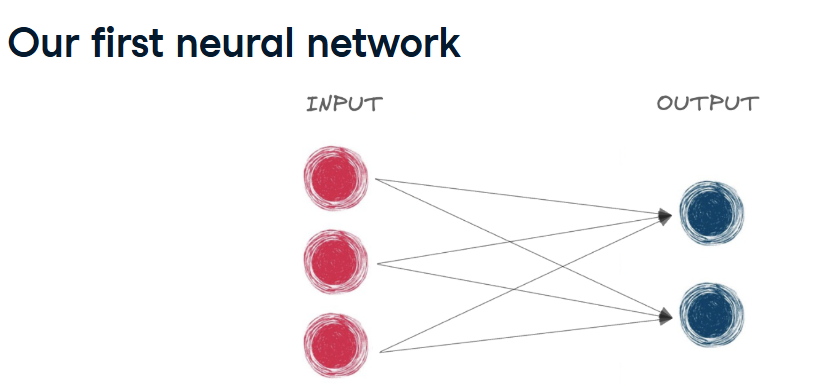


In [26]:
import torch.nn as nn

# Set random seed for reproducibility
torch.manual_seed(42)  # You can use any number

# Optional: For GPU operations (if you're using CUDA)
# torch.cuda.manual_seed_all(42)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

In [27]:
# create input tensor with 3 features
input_data = [[0.3471, 0.4547, -0.2356]]
print("input_data:", input_data)
input_tensor = torch.tensor(input_data)

# Define our linear layer
torch.manual_seed(42)
linear_layer = nn.Linear(
        in_features=3, 
        out_features=2
        
        )

# nn.Linear accepts several parameters:
#   - in_features: size of each input sample (required)
#   - out_features: size of each output sample (required)
#   - bias: If set to False, the layer will not learn an additive bias. Default: True
#   - device: the device on which the parameter tensors will be allocated (optional, PyTorch 1.10+)
#   - dtype: the desired data type of the parameters (optional, PyTorch 1.10+)
# Example:
#   nn.Linear(in_features=3, out_features=2, bias=True, device=None, dtype=None)

input_data: [[0.3471, 0.4547, -0.2356]]


In [28]:
# Pass input tensor through linear layer
output_tensor = linear_layer(input_tensor)
print(output_tensor)
# todo: what are the weights being accepted?

tensor([[0.1219, 0.4382]], grad_fn=<AddmmBackward0>)


In [29]:
print("linear_layer.weight")
print(linear_layer.weight)

print("linear_layer.bias")
print(linear_layer.bias)

linear_layer.weight
Parameter containing:
tensor([[ 0.4414,  0.4792, -0.1353],
        [ 0.5304, -0.1265,  0.1165]], requires_grad=True)
linear_layer.bias
Parameter containing:
tensor([-0.2811,  0.3391], requires_grad=True)


In [ ]:
# todo: 
# what is requires_grad in the output here?

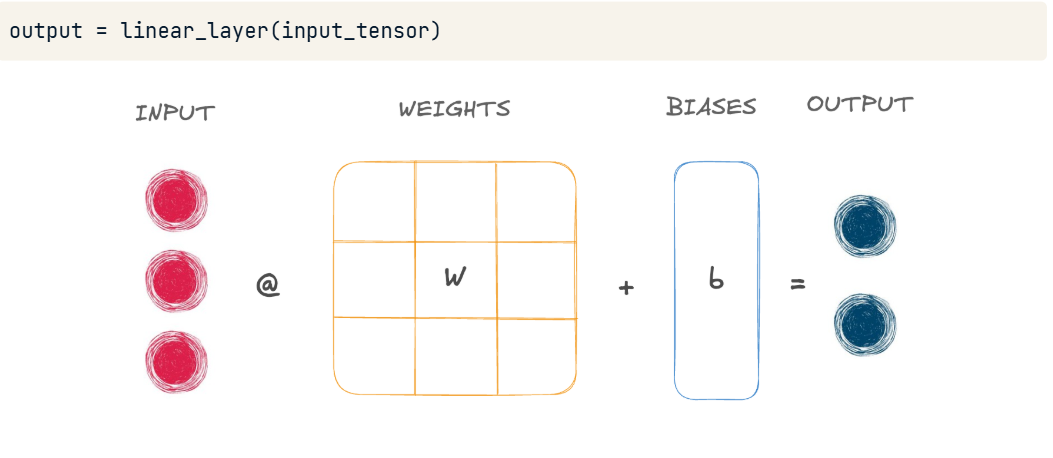

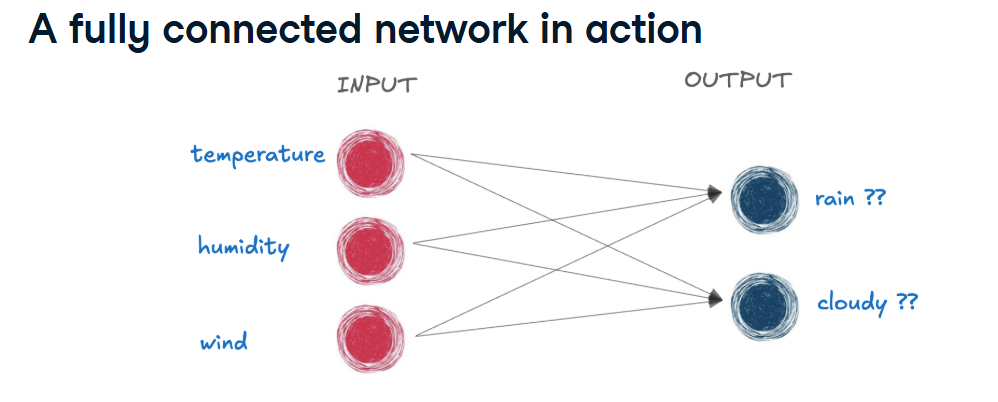

##### (1 or more) Hidden Layers

Funny Connected = No Stray Arrows = Each Layers Input covers all neurons of that layer     
Each Neuron has N+1 Params (n neurons from input layer, and 1 bias)    
More hidden layers = More Parameters = Higher Model Capacity (more complex datasets)     

In [31]:
# Stacking multiple layers

n_features = 10 # number of columns in input table
n_classes = 2   # number of classes in the prediction

my_model = nn.Sequential(
    # declare hidden layer below
    nn.Linear(n_features, 8), # 8 output in this layer must match 8 input in next later
    nn.Linear(8, 4),          # 4 output in this layer must match 4 input in next later 
    nn.Linear(4, n_classes)
)

my_model

Sequential(
  (0): Linear(in_features=10, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=4, bias=True)
  (2): Linear(in_features=4, out_features=2, bias=True)
)

In [42]:
for param in my_model.parameters():
    print("\n")
    print(param)
    print(type(param))



Parameter containing:
tensor([[ 0.2348, -0.2321, -0.0546,  0.0661,  0.1633,  0.2553,  0.2881, -0.2507,
          0.0796, -0.1360],
        [-0.0347, -0.2367,  0.2880, -0.2321,  0.1690,  0.1111,  0.1028, -0.1710,
          0.2874,  0.0695],
        [ 0.0407, -0.2787,  0.1327, -0.0474, -0.1449,  0.2716,  0.0705, -0.1750,
         -0.1601, -0.0151],
        [ 0.1766, -0.0808, -0.1804, -0.1083, -0.2362,  0.1128,  0.2448, -0.2977,
          0.0734,  0.1634],
        [ 0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,  0.0338,
         -0.0559, -0.0942],
        [ 0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,  0.0886,
         -0.2872, -0.1167],
        [ 0.2663,  0.1232, -0.0157, -0.1907, -0.1935, -0.2833, -0.1031,  0.1068,
          0.2016,  0.1460],
        [-0.2795, -0.1902, -0.0499,  0.3059,  0.0457, -0.0819,  0.1308, -0.1204,
         -0.2047,  0.2308]], requires_grad=True)
<class 'torch.nn.parameter.Parameter'>


Parameter containing:
tensor([-0.1438, -0.

In [40]:
# model complexity - calculate total parameters

my_model = nn.Sequential(
    # declare hidden layer below
    nn.Linear(10, 8), # each neuron has 10 weights and 1 bias each = 8*(10)+ 8 = 88 
    nn.Linear(8, 4),  # each neuron has  8 weights and 1 bias each = 4*(8) + 4 = 36
    nn.Linear(4, 2)   # each neuron has  4 weights and 1 bias each = 2*(4) + 2 = 10
                      # 88 + 36 + 10 = 134 learnable parameters
)

In [41]:
total_param = 0
for param in my_model.parameters():
    total_param = total_param + param.numel()
    print(param.numel()) # numel() stands for number of elements in a tensor

print("total_param:", total_param)

80
8
32
4
8
2
total_param: 134


# Neural Network Architecture and Hyperparameters


# Training a Neural Network with PyTorch


# Evaluating and Improving Models

# Miscellaneous


In [ ]:
# How to Export a Model

# Method 1: Save the entire model (simplest)
# Saves both the model architecture and weights
torch.save(my_model, 'my_model.pth')  # or 'my_model.pt' - both work!

# Load it later
# loaded_model = torch.load('my_model.pth')
# loaded_model.eval()  # Set to evaluation mode


# Method 2: Save only the state_dict (recommended)
# Saves only the weights and biases, not the model structure
# You need to recreate the model architecture when loading
torch.save(my_model.state_dict(), 'my_model_weights.pth')

# Load it later (you need to recreate the model structure first)
# my_model_loaded = nn.Sequential(
#     nn.Linear(10, 8),
#     nn.Linear(8, 4),
#     nn.Linear(4, 2)
# )
# my_model_loaded.load_state_dict(torch.load('my_model_weights.pth'))
# my_model_loaded.eval()


# Method 3: Save model + metadata (best practice)
# Save both the state_dict and any other info you need
checkpoint = {
    'model_state_dict': my_model.state_dict(),
    'model_architecture': {
        'layers': [(10, 8), (8, 4), (4, 2)]
    }
}
torch.save(checkpoint, 'my_model_complete.pth')

# Load it later
# checkpoint = torch.load('my_model_complete.pth')
# my_model_loaded = nn.Sequential(
#     nn.Linear(10, 8),
#     nn.Linear(8, 4),
#     nn.Linear(4, 2)
# )
# my_model_loaded.load_state_dict(checkpoint['model_state_dict'])
# my_model_loaded.eval()


# Note: File extensions
# - .pth and .pt both work (PyTorch doesn't enforce a specific extension)
# - .pth is commonly used for model checkpoints (state_dict)
# - .pt is also common, sometimes preferred for TorchScript models
# - Always call .eval() when loading a model for inference


In [ ]:
# # todo:
# # Iris dataset classification with PyTorch

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder

# # 1. Load the iris dataset
# iris = load_iris()
# X = iris['data']  # (150, 4)
# y = iris['target']  # (150,)

# # 2. Preprocess data: Scaling and train-test split
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Optionally, encode targets if not already done
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y)

# # Convert to torch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# # 3. Define a simple neural network
# class IrisNet(nn.Module):
#     def __init__(self):
#         super(IrisNet, self).__init__()
#         self.fc1 = nn.Linear(4, 16)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(16, 8)
#         self.relu2 = nn.ReLU()
#         self.fc3 = nn.Linear(8, 3)  # 3 classes

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu1(x)
#         x = self.fc2(x)
#         x = self.relu2(x)
#         x = self.fc3(x)
#         return x

# model = IrisNet()

# # 4. Training setup
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.01)
# epochs = 100

# # 5. Training loop
# for epoch in range(epochs):
#     model.train()
#     optimizer.zero_grad()
#     outputs = model(X_train_tensor)
#     loss = criterion(outputs, y_train_tensor)
#     loss.backward()
#     optimizer.step()
#     if (epoch+1) % 20 == 0 or epoch == 0:
#         print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# # 6. Evaluation
# model.eval()
# with torch.no_grad():
#     test_outputs = model(X_test_tensor)
#     _, predicted = torch.max(test_outputs, 1)
#     accuracy = (predicted == y_test_tensor).float().mean()
#     print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')